In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [20]:
scaler = StandardScaler()
pca = PCA()

In [21]:
classic_stats = pd.read_csv('data/classic_stats.csv')
statcast = pd.read_csv('data/statcast.csv')

In [22]:
classic_stats = classic_stats.drop(columns='Unnamed: 20')
statcast = statcast.drop(columns='Unnamed: 12')

<AxesSubplot:>

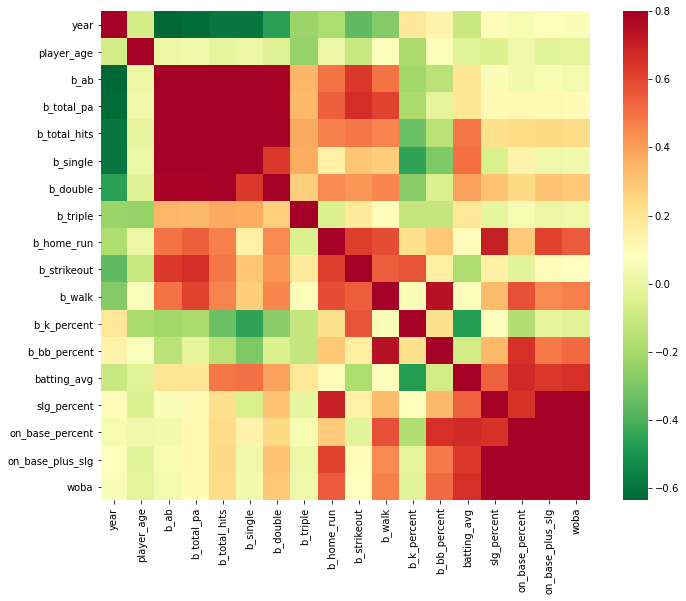

In [23]:
corrmat = classic_stats.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

<AxesSubplot:>

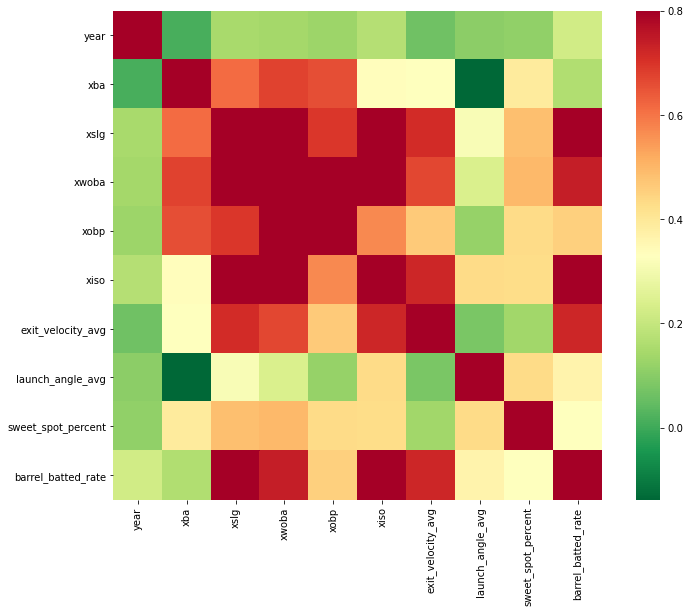

In [24]:
corrmat = statcast.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

In [29]:
statcast.head()

,last_name,first_name,year,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate
0,Martinez,Victor,2018,0.266,0.405,0.314,0.314,0.140,87.8,14.1,35.1,4.7
1,Mauer,Joe,2018,0.288,0.437,0.346,0.357,0.149,91.1,4.4,36.9,5.0
2,Choo,Shin-Soo,2018,0.249,0.461,0.361,0.364,0.212,89.3,6.1,35.9,11.1
3,Molina,Yadier,2018,0.266,0.431,0.330,0.320,0.166,88.2,15.4,37.6,5.5
4,Encarnacion,Edwin,2018,0.241,0.470,0.351,0.336,0.229,89.9,18.0,34.1,11.2


In [34]:
statcast_nums = statcast.drop(columns=['last_name',' first_name','year'])

In [35]:
scaled_df = pd.DataFrame(scaler.fit_transform(statcast_nums))
scaled_df.columns = statcast_nums.columns
scaled_df

,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate
0,0.319590,-0.475926,-0.521504,-0.518779,-0.677212,-0.540289,0.375105,0.350847,-0.711916
1,1.253975,-0.024497,0.342586,0.740527,-0.525819,0.991148,-1.850689,0.811695,-0.637341
2,-0.402435,0.314075,0.747629,0.945530,0.533933,0.155819,-1.460601,0.555669,0.879023
3,0.319590,-0.109140,-0.089459,-0.343062,-0.239854,-0.354660,0.673407,0.990914,-0.513048
4,-0.742211,0.441040,0.477601,0.125517,0.819898,0.434262,1.270012,0.094820,0.903881
...,...,...,...,...,...,...,...,...,...
845,0.362062,0.666755,0.639618,0.623382,0.651683,-0.215438,-0.473909,-1.671765,0.456430
846,-0.657267,-0.786284,-1.547611,-2.012374,-0.677212,-1.561246,-1.024621,-0.494041,-0.612482
847,-0.232547,1.343899,0.828637,0.271948,1.711435,0.851926,1.155280,0.402052,1.152465
848,0.192173,0.539790,0.099561,-0.577351,0.584397,-0.169031,-1.231138,-0.724466,0.605580


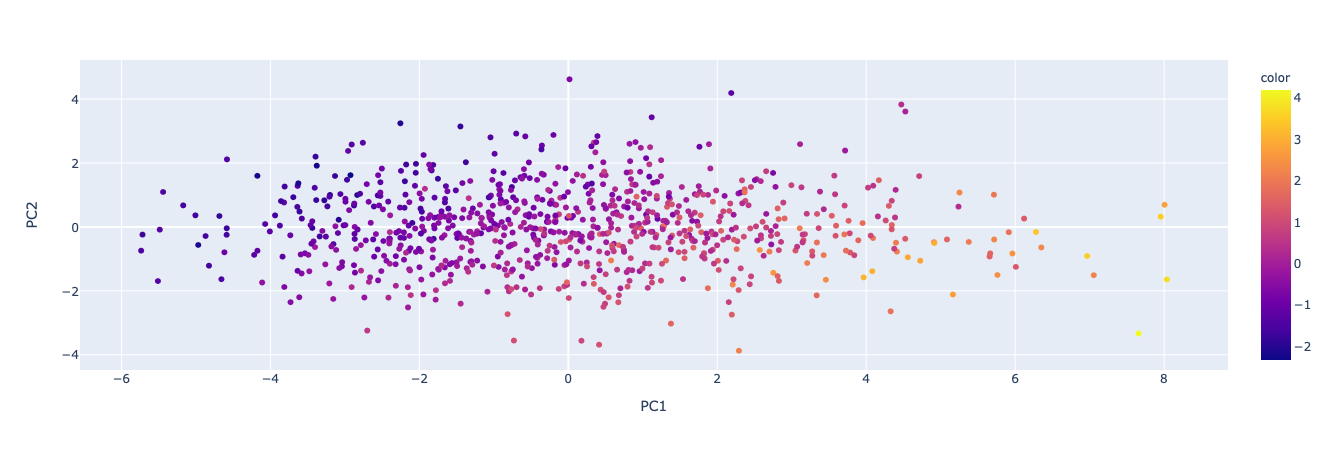

In [91]:
pca = PCA(n_components=3)
components = pca.fit_transform(scaled_df)
labels = {
    'x':'PC1', 'y':'PC2'
}
fig = px.scatter(
    x = components[:, 0],
    y = components[:, 1],
    color=scaled_df['xobp'],
    labels=labels
)
# fig.update_traces(diagonal_visible=False)
fig.show()

In [40]:
# elbow rule
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

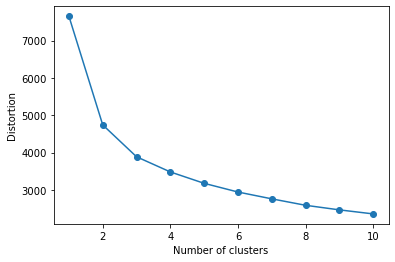

In [41]:
plot_distortion(scaled_df)

In [86]:
km = KMeans(n_clusters=2 , n_init=10)
y_res = km.fit_predict(scaled_df)

In [87]:
plt.rcParams["figure.figsize"] = (12,8)

In [88]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [89]:
all_principal_components = pca.fit_transform(scaled_df)

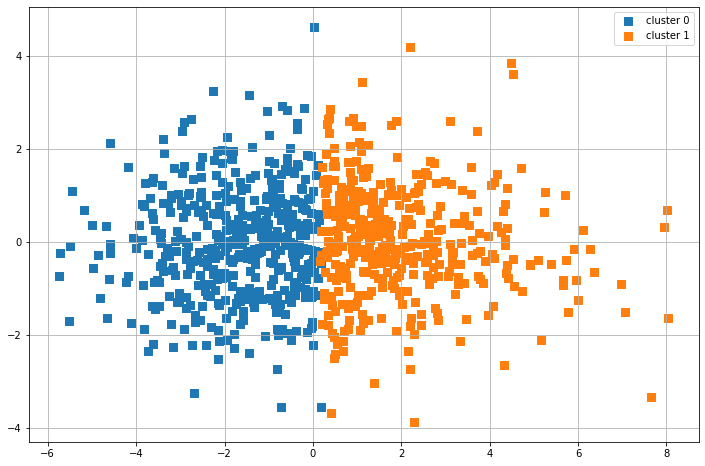

In [90]:
plot_clusters(all_principal_components,y_res)